This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformed import InversePhysicsInformedBarModel # py file which has custom class defined
import torch
import math
import matplotlib.pyplot as plt

Custom function needed to generate training and testing data

In [2]:
def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)

2. Analytical 'u' is given

In [3]:
L = 1
x = generate_grid_1d(L, 20)
u_analytic = lambda x: torch.sin(2*math.pi*x)
u = u_analytic(x)

Analytical inverse solution for validation

In [4]:
EA_analytic = lambda x: x**3 - x**2 + 1

3. Problem data are defined. Here the known data like boundary condition and loading conditions are defined

In [5]:
distLoad = lambda x: -2*(3*x**2 - 2*x)*math.pi*torch.cos(2*math.pi*x) + 4*(x**3 - x**2 + 1)*math.pi**2*torch.sin(2*math.pi*x)

4. Next we generate the neural network model using the imported class InversePhysicsInformedBarModel

In [6]:
pinnModel = InversePhysicsInformedBarModel(x, u, L, distLoad) # custom class defined in physicsinformed.py file

5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [7]:
epochs = 500
learningRate = 0.001
weightDecay = 0.1

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate) # function defined in custom class for training

Epoch: 1, Cost: 916.4978637695312, Differential Equation Loss: 916.4978637695312
Epoch: 2, Cost: 836.0173950195312, Differential Equation Loss: 836.0173950195312
Epoch: 3, Cost: 642.8765869140625, Differential Equation Loss: 642.8765869140625
Epoch: 4, Cost: 539.6780395507812, Differential Equation Loss: 539.6780395507812
Epoch: 5, Cost: 466.04803466796875, Differential Equation Loss: 466.04803466796875
Epoch: 6, Cost: 404.30096435546875, Differential Equation Loss: 404.30096435546875
Epoch: 7, Cost: 349.15362548828125, Differential Equation Loss: 349.15362548828125
Epoch: 8, Cost: 301.1489562988281, Differential Equation Loss: 301.1489562988281
Epoch: 9, Cost: 260.3804626464844, Differential Equation Loss: 260.3804626464844
Epoch: 10, Cost: 224.2122802734375, Differential Equation Loss: 224.2122802734375
Epoch: 11, Cost: 190.2197265625, Differential Equation Loss: 190.2197265625
Epoch: 12, Cost: 158.34457397460938, Differential Equation Loss: 158.34457397460938
Epoch: 13, Cost: 129.23

Epoch: 101, Cost: 0.09508395195007324, Differential Equation Loss: 0.09508395195007324
Epoch: 102, Cost: 0.08888840675354004, Differential Equation Loss: 0.08888840675354004
Epoch: 103, Cost: 0.08377955108880997, Differential Equation Loss: 0.08377955108880997
Epoch: 104, Cost: 0.07968894392251968, Differential Equation Loss: 0.07968894392251968
Epoch: 105, Cost: 0.07638982683420181, Differential Equation Loss: 0.07638982683420181
Epoch: 106, Cost: 0.07352543622255325, Differential Equation Loss: 0.07352543622255325
Epoch: 107, Cost: 0.07056461274623871, Differential Equation Loss: 0.07056461274623871
Epoch: 108, Cost: 0.06751348823308945, Differential Equation Loss: 0.06751348823308945
Epoch: 109, Cost: 0.06477680802345276, Differential Equation Loss: 0.06477680802345276
Epoch: 110, Cost: 0.062445200979709625, Differential Equation Loss: 0.062445200979709625
Epoch: 111, Cost: 0.06049554422497749, Differential Equation Loss: 0.06049554422497749
Epoch: 112, Cost: 0.058781445026397705, D

Epoch: 196, Cost: 0.0006654354510828853, Differential Equation Loss: 0.0006654354510828853
Epoch: 197, Cost: 0.0006410658825188875, Differential Equation Loss: 0.0006410658825188875
Epoch: 198, Cost: 0.000618219724856317, Differential Equation Loss: 0.000618219724856317
Epoch: 199, Cost: 0.0005954522639513016, Differential Equation Loss: 0.0005954522639513016
Epoch: 200, Cost: 0.000572372111491859, Differential Equation Loss: 0.000572372111491859
Epoch: 201, Cost: 0.000549895572476089, Differential Equation Loss: 0.000549895572476089
Epoch: 202, Cost: 0.0005282036727294326, Differential Equation Loss: 0.0005282036727294326
Epoch: 203, Cost: 0.0005072528729215264, Differential Equation Loss: 0.0005072528729215264
Epoch: 204, Cost: 0.0004871188721153885, Differential Equation Loss: 0.0004871188721153885
Epoch: 205, Cost: 0.0004677772521972656, Differential Equation Loss: 0.0004677772521972656
Epoch: 206, Cost: 0.000449169339844957, Differential Equation Loss: 0.000449169339844957
Epoch: 

Epoch: 286, Cost: 8.232129039242864e-05, Differential Equation Loss: 8.232129039242864e-05
Epoch: 287, Cost: 8.212633110815659e-05, Differential Equation Loss: 8.212633110815659e-05
Epoch: 288, Cost: 8.197282295441255e-05, Differential Equation Loss: 8.197282295441255e-05
Epoch: 289, Cost: 8.188320498447865e-05, Differential Equation Loss: 8.188320498447865e-05
Epoch: 290, Cost: 8.173643436748534e-05, Differential Equation Loss: 8.173643436748534e-05
Epoch: 291, Cost: 8.163929305737838e-05, Differential Equation Loss: 8.163929305737838e-05
Epoch: 292, Cost: 8.152681402862072e-05, Differential Equation Loss: 8.152681402862072e-05
Epoch: 293, Cost: 8.138293924275786e-05, Differential Equation Loss: 8.138293924275786e-05
Epoch: 294, Cost: 8.132604853017256e-05, Differential Equation Loss: 8.132604853017256e-05
Epoch: 295, Cost: 8.122436702251434e-05, Differential Equation Loss: 8.122436702251434e-05
Epoch: 296, Cost: 8.117609831970185e-05, Differential Equation Loss: 8.117609831970185e-05

Epoch: 378, Cost: 7.729180651949719e-05, Differential Equation Loss: 7.729180651949719e-05
Epoch: 379, Cost: 7.7261749538593e-05, Differential Equation Loss: 7.7261749538593e-05
Epoch: 380, Cost: 7.722781447228044e-05, Differential Equation Loss: 7.722781447228044e-05
Epoch: 381, Cost: 7.716425170656294e-05, Differential Equation Loss: 7.716425170656294e-05
Epoch: 382, Cost: 7.712769729550928e-05, Differential Equation Loss: 7.712769729550928e-05
Epoch: 383, Cost: 7.705534517299384e-05, Differential Equation Loss: 7.705534517299384e-05
Epoch: 384, Cost: 7.70428596297279e-05, Differential Equation Loss: 7.70428596297279e-05
Epoch: 385, Cost: 7.700728747295216e-05, Differential Equation Loss: 7.700728747295216e-05
Epoch: 386, Cost: 7.695117528783157e-05, Differential Equation Loss: 7.695117528783157e-05
Epoch: 387, Cost: 7.69194884924218e-05, Differential Equation Loss: 7.69194884924218e-05
Epoch: 388, Cost: 7.691857899772003e-05, Differential Equation Loss: 7.691857899772003e-05
Epoch: 

Epoch: 471, Cost: 7.445830851793289e-05, Differential Equation Loss: 7.445830851793289e-05
Epoch: 472, Cost: 7.44027056498453e-05, Differential Equation Loss: 7.44027056498453e-05
Epoch: 473, Cost: 7.43640775908716e-05, Differential Equation Loss: 7.43640775908716e-05
Epoch: 474, Cost: 7.436232408508658e-05, Differential Equation Loss: 7.436232408508658e-05
Epoch: 475, Cost: 7.431208359776065e-05, Differential Equation Loss: 7.431208359776065e-05
Epoch: 476, Cost: 7.425561489071697e-05, Differential Equation Loss: 7.425561489071697e-05
Epoch: 477, Cost: 7.424751674989238e-05, Differential Equation Loss: 7.424751674989238e-05
Epoch: 478, Cost: 7.422873022733256e-05, Differential Equation Loss: 7.422873022733256e-05
Epoch: 479, Cost: 7.42057673051022e-05, Differential Equation Loss: 7.42057673051022e-05
Epoch: 480, Cost: 7.419897883664817e-05, Differential Equation Loss: 7.419897883664817e-05
Epoch: 481, Cost: 7.420167094096541e-05, Differential Equation Loss: 7.420167094096541e-05
Epoch

(499, array(7.3738964e-05, dtype=float32))

6. We generate sample test data using utilities library and then predict the displacements at those test points

In [8]:
samples = 100
x_test = generate_grid_1d(L, samples)
u_test = u_analytic(x_test)
EA_test = pinnModel.predict(x_test,u_test) # function defined in custom class for predicting EA values

7. We plot predicted coefficient (EA) at test points and also the training history

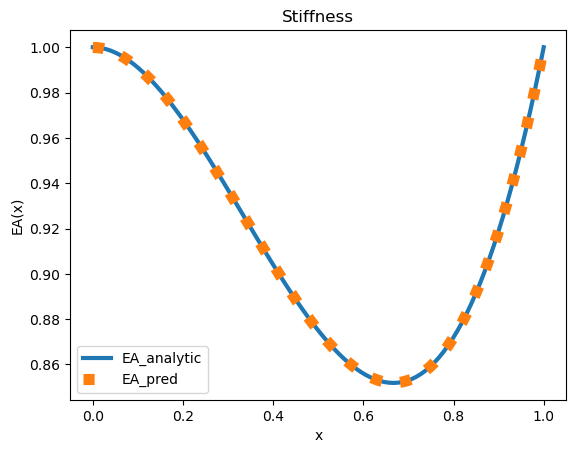

In [9]:
# plot the results and training losses. Refer the pptx file results slide for more information
import matplotlib.pyplot as plt
plt.plot(x_test.detach().numpy(), EA_analytic(x_test).detach().numpy(), label="EA_analytic",lw = 3)
plt.plot(x_test.detach().numpy(), EA_test.detach().numpy(), label="EA_pred", linestyle=":", lw=8)
plt.ylabel("EA(x)")
plt.xlabel("x")
plt.title("Stiffness")
plt.legend()

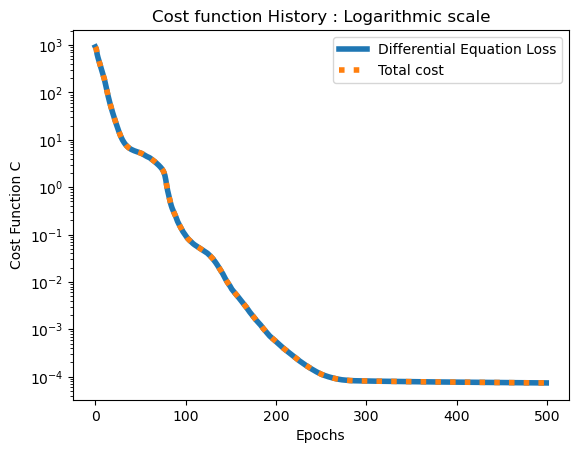

In [10]:
plt.plot(pinnModel.loss,label="Differential Equation Loss",lw = 4)
plt.plot(pinnModel.loss,label="Total cost", linestyle=":",lw = 4)
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Cost Function C")
plt.legend()
plt.title("Cost function History : Logarithmic scale")
plt.show()

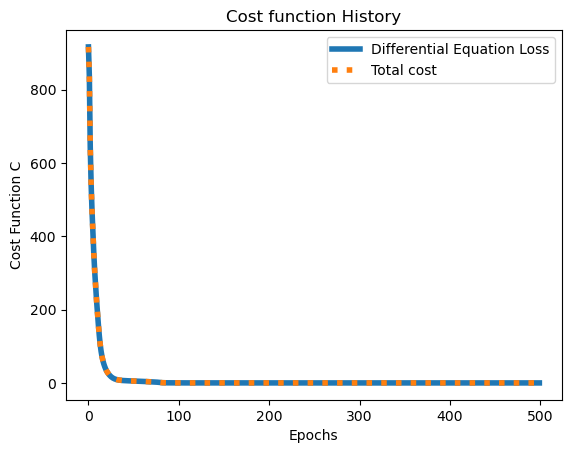

In [11]:
plt.plot(pinnModel.loss,label="Differential Equation Loss",lw=4)
plt.plot(pinnModel.loss,label="Total cost", linestyle=":",lw = 4)
plt.xlabel("Epochs")
plt.ylabel("Cost Function C")
plt.legend()
plt.title("Cost function History")
plt.show()